# Capital Allocation: Rebalancing vs. Non-Rebalancing Strategies

### Read Data File

In [7]:
import pandas as pd
import numpy as np

# Change the file path 
file_path = r"C:\...\F-F_Research_Data_Factors.txt"

# Read the data from the file until a blank line is encountered
data_lines = []
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if not line:  # Stop if the line is empty (blank line)
            break
        data_lines.append(line)

# Read the data from the file using pandas (first three lines are ignored)
data = pd.read_csv(file_path, sep='\s+', skiprows=3)

# Display the first few rows of the data
print(data.tail())


        Mkt-RF   SMB   HML    RF
202302   -2.58  1.21 -0.78  0.34
202303    2.51 -5.59 -9.01  0.36
202304    0.61 -3.34 -0.03  0.35
202305    0.35  1.53 -7.80  0.36
202306    6.46  1.55 -0.20  0.40


### Create Market Return

In [3]:
# Calculate the 'Mkt' column by adding 'Mkt-RF' and 'RF'
data['Mkt'] = data['Mkt-RF'] + data['RF']

# Display the modified data
print(data.head())

        Mkt-RF   SMB   HML    RF   Mkt
192607    2.96 -2.56 -2.43  0.22  3.18
192608    2.64 -1.17  3.82  0.25  2.89
192609    0.36 -1.40  0.13  0.23  0.59
192610   -3.24 -0.09  0.70  0.32 -2.92
192611    2.53 -0.10 -0.51  0.31  2.84


### Risk Premium and Volatility

In [16]:
# Calculate the average return of 'Mkt-RF' column
average_excess_return = data['Mkt-RF'].mean()
annual_excess_return = (1+average_excess_return/100)**12-1

# Calculate the volatility (standard deviation) of 'Mkt-RF' column
volatility = data['Mkt-RF'].std()
annual_volatility = volatility * np.sqrt(12) /100

# Display the calculated values
print("Risk Premium:", annual_excess_return)
print("Volatility:", annual_volatility)

Risk Premium: 0.08424790376519198
Volatility: 0.18520179276675616


### Plot Pie Charts for Optimal Portfolios

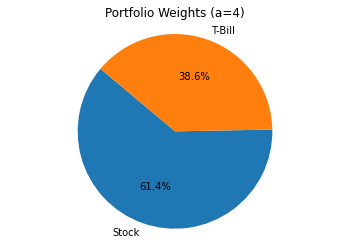

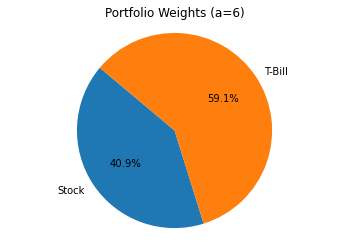

In [18]:
import matplotlib.pyplot as plt

# Define values of 'a' for the MV portfolio
a_values = [4,6]

# Iterate over 'a' values to calculate portfolio weights and create pie charts
for a in a_values:
    portfolio_weight_risky = annual_excess_return/(a*annual_volatility**2)
    portfolio_weight_risk_free = 1 - portfolio_weight_risky
    
    # Create a pie chart
    labels = ['Stock', 'T-Bill']
    sizes = [portfolio_weight_risky, portfolio_weight_risk_free]
    
    plt.figure()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"Portfolio Weights (a={a})")
    plt.show()


### Plot the Cumulative Returns of Different Stategies for Different Periods

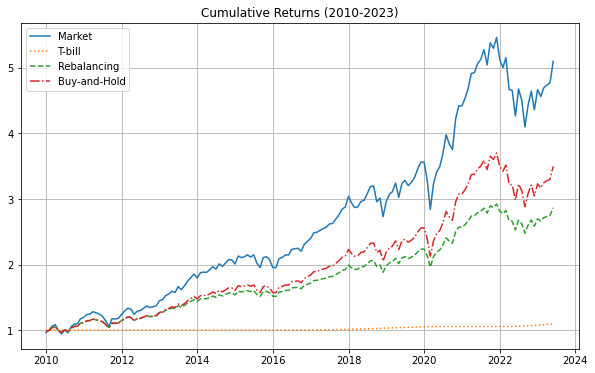

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_cumulative_returns(data, start_year, end_year):
    # Convert the first column to a datetime format
    data['Date'] = pd.to_datetime(data.index, format='%Y%m')

    # Filter data between start_year and end_year
    filtered_data = data[(data['Date'].dt.year >= start_year) & (data['Date'].dt.year <= end_year)].copy()

    # Calculate cumulative returns
    filtered_data['Cumulative_Mkt'] = (1 + filtered_data['Mkt'] / 100).cumprod()
    filtered_data['Cumulative_RF'] = (1 + filtered_data['RF'] / 100).cumprod()
    
    # Implement 60:40 strategy
    weight_mkt = 0.6
    weight_rf = 0.4
    filtered_data['Rebalancing'] = weight_mkt * filtered_data['Mkt'] + weight_rf * filtered_data['RF']
    filtered_data['Cumulative_Rebalancing'] = (1 + filtered_data['Rebalancing'] / 100).cumprod()
    filtered_data['Cumulative_Non_Rebalancing'] = weight_mkt * filtered_data['Cumulative_Mkt'] + weight_rf * filtered_data['Cumulative_RF']

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    # Plot for the given period
    axes.plot(filtered_data['Date'], filtered_data['Cumulative_Mkt'], label='Cumulative Mkt')
    axes.plot(filtered_data['Date'], filtered_data['Cumulative_RF'], label='Cumulative RF', linestyle=':')
    axes.plot(filtered_data['Date'], filtered_data['Cumulative_Rebalancing'], label='Rebalancing', linestyle='--')
    axes.plot(filtered_data['Date'], filtered_data['Cumulative_Non_Rebalancing'], label='Non-rebalancing', linestyle='-.')
    axes.set_title(f'Cumulative Returns ({start_year}-{end_year})')
    axes.legend(['Market','T-bill','Rebalancing','Buy-and-Hold'])

    # Show the plot
    plt.grid(True)
    plt.show()


# Set the start_year and te end_year

#start_year = 1926; end_year = 1945
#start_year = 1990; end_year = 2010
start_year = 2010; end_year = 2023


# Call the function
plot_cumulative_returns(data, start_year, end_year)
